# Unit Project 2: Exploratory Data Analysis

## 1. Outline of Exporatory Data Analysis Methods

1. Read in the data.

2. Identify rows with missing values and decide how to handle them.

3. Construct tables of descriptive statistics and correlation tables. It would be interesting to see not only descriptive statistics for the entire applicant pool, but also to see how descriptive statistics differ between admitted and nonadmitted applicants.

4. Describe the distribution of the variables using histograms and boxplots.

5. Construct a covariance matrix.

6. Identify any issues and limitations of the exploratory data analysis.

## 2. Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Python/2.7/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data = pd.read_csv("/Users/stevenwang/DAT-NYC-45/unit-project/dataset/ucla-admissions.csv")
data.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
data.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [5]:
missing_data = data[(data["gre"].isnull()==True) | (data["gpa"].isnull()==True) | (data["prestige"].isnull()==True)]
missing_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Out of 400 observations, there are 3 with at least one missing feature (gre, gpa, and/or prestige).

Given that this is a small number of rows (less than 1% of the dataset), I am going to remove them. This results in 397 rows with complete data.

In [7]:
ucla = data[data["gpa"].apply(np.isnan) == False]
ucla = ucla[ucla["gre"].apply(np.isnan) == False]
ucla = ucla[ucla["prestige"].apply(np.isnan) == False]

## 3. Descriptive Statistics

Below are tables of descriptive statistics for the dataset (all observations with values for all three features).

Also included is a pairplot of the variables for the dataset.

In [8]:
ucla.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


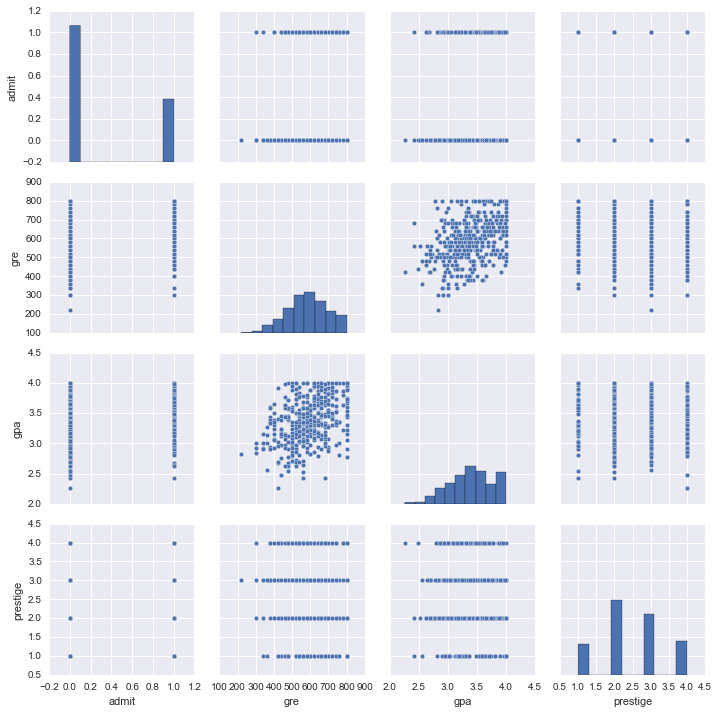

In [25]:
sns.pairplot(ucla)

### Correlation Table

In [9]:
ucla.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### Admitted versus Nonadmitted Applicants

The descriptive statistics for admitted applicants and nonadmitted applicants likely differ. Below, I have divided the dataset into admitted applicants and nonadmitted applicants and constructed tables of descriptive statistics and correlation tables for both groups.

In [10]:
admit = ucla[ucla["admit"]==1]
nonadmit = ucla[ucla["admit"] == 0]

#### Admitted Applicants Descriptive Statistics

In [11]:
admit.describe()

,admit,gre,gpa,prestige
count,126.0,126.000000,126.000000,126.000000
mean,1.0,618.571429,3.489206,2.150794
std,0.0,109.257233,0.371655,0.921455
min,1.0,300.000000,2.420000,1.000000
25%,1.0,540.000000,3.220000,1.000000
50%,1.0,620.000000,3.545000,2.000000
75%,1.0,680.000000,3.757500,3.000000
max,1.0,800.000000,4.000000,4.000000


#### Admitted Applicants Correlation Table

In [11]:
admit.corr()

,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.232765,-0.080485
gpa,NaN,0.232765,1.000000,-0.039360
prestige,NaN,-0.080485,-0.039360,1.000000


##### Nonadmitted Applicants Descriptive Statistics

In [12]:
nonadmit.describe()

,admit,gre,gpa,prestige
count,271.0,271.000000,271.000000,271.000000
mean,0.0,573.579336,3.347159,2.645756
std,0.0,116.052798,0.376355,0.918922
min,0.0,220.000000,2.260000,1.000000
25%,0.0,500.000000,3.080000,2.000000
50%,0.0,580.000000,3.340000,3.000000
75%,0.0,660.000000,3.610000,3.000000
max,0.0,800.000000,4.000000,4.000000


#### Nonadmitted Applicants Correlation Table

In [13]:
nonadmit.corr()

,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.418175,-0.086004
gpa,NaN,0.418175,1.000000,-0.010311
prestige,NaN,-0.086004,-0.010311,1.000000


## 4. Distribution of Data and Boxplots

### A. Admission

UCLA is a fairly selective school, admitting just over 30% of the applicants in the dataset.

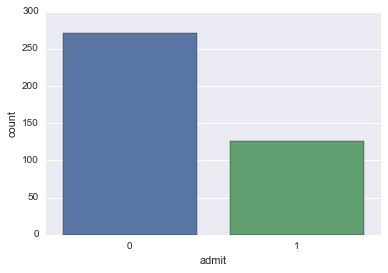

In [30]:
sns.countplot(ucla["admit"])

In [28]:
print "Number of applicants in dataset admitted:", admit.shape[0]
print "Number of applicants in dataset not admitted:", nonadmit.shape[0]
print
print "% of applicants admitted:", round(admit.shape[0]/float(len(ucla)) * 100, 2)
print "% of applicants not admitted:", round(nonadmit.shape[0]/float(len(ucla)) * 100, 2)

 Number of applicants in dataset admitted: 126
Number of applicants in dataset not admitted: 271

% of applicants admitted: 31.74
% of applicants not admitted: 68.26


### B. GRE Scores

As shown in the histograms and boxplots below, applicants' GRE scores are generally distributed normally. The GRE scores of admitted applicants are higher on average than the GRE scores of all applicants and of nonadmitted applicants, and so the distribution of GRE scores of admitted applicants is right-shifted.

In [14]:
print "Average GRE score of all applicants:", round(ucla["gre"].mean(),2)
print "Average GRE score of admitted applicants:", round(admit["gre"].mean(),2)
print "Average GRE score of nonadmitted applicants:", round(nonadmit["gre"].mean(),2)

Average GRE score of all applicants: 587.86
Average GRE score of admitted applicants: 618.57
Average GRE score of nonadmitted applicants: 573.58


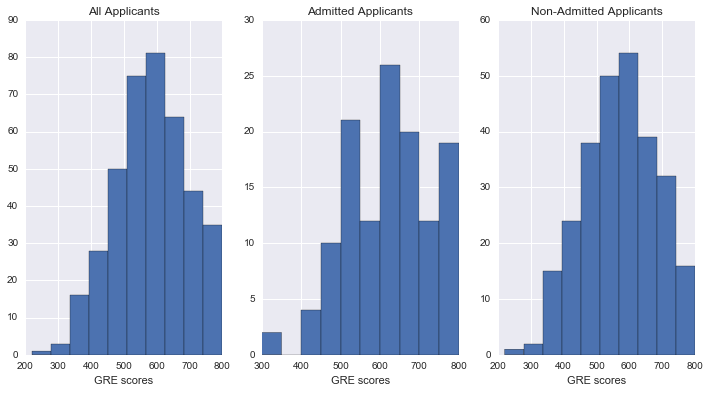

In [15]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.hist(ucla["gre"])
plt.xlabel("GRE scores")
plt.title("All Applicants")
plt.subplot(1,3,2)
plt.hist(admit["gre"])
plt.xlabel("GRE scores")
plt.title("Admitted Applicants")
plt.subplot(1,3,3)
plt.hist(nonadmit["gre"])
plt.xlabel("GRE scores")
plt.title("Non-Admitted Applicants");

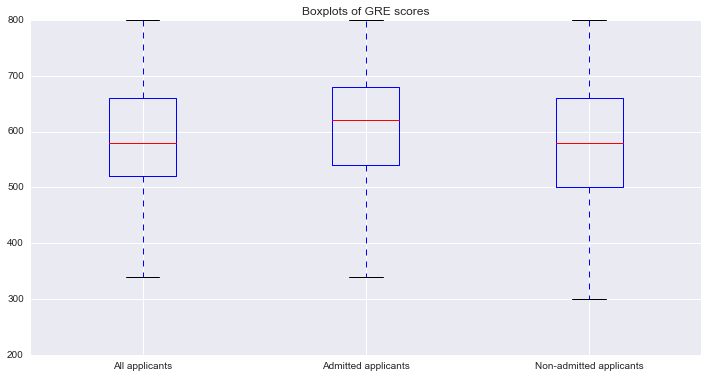

In [16]:
plt.figure(figsize = (12,6))
gre_data = [ucla["gre"], admit["gre"], nonadmit["gre"]]
labels = ["All applicants", "Admitted applicants", "Non-admitted applicants"]
plt.title("Boxplots of GRE scores")
plt.boxplot(gre_data, labels = labels);

### C. GPA scores

As shown in the histograms and boxplots below, the distribution curves for GPA scores are right-shifted. This is not surprising, as UCLA not only attracts talented applicants, but we would also expect graduate school applicants to have respectable GPAs. 

In particular, the right-shifted curve for admitted applicants' GPA is especially pronounced.

In [17]:
print "Average GPA of all applicants:", round(ucla["gpa"].mean(),2)
print "Average GPA of admitted applicants:", round(admit["gpa"].mean(),2)
print "Average GPA of nonadmitted applicants:", round(nonadmit["gpa"].mean(),2)

Average GPA of all applicants: 3.39
Average GPA of admitted applicants: 3.49
Average GPA of nonadmitted applicants: 3.35


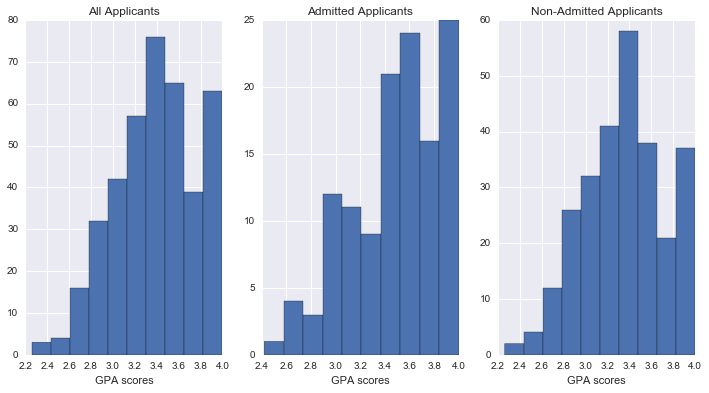

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.hist(ucla["gpa"])
plt.xlabel("GPA scores")
plt.title("All Applicants")
plt.subplot(1,3,2)
plt.hist(admit["gpa"])
plt.xlabel("GPA scores")
plt.title("Admitted Applicants")
plt.subplot(1,3,3)
plt.hist(nonadmit["gpa"])
plt.xlabel("GPA scores")
plt.title("Non-Admitted Applicants");

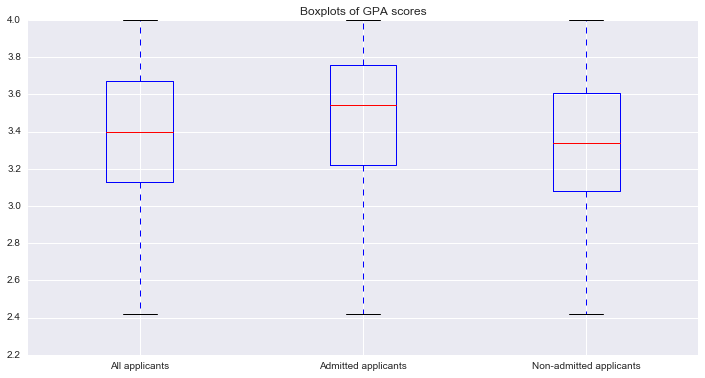

In [19]:
plt.figure(figsize = (12,6))
gpa_data = [ucla["gpa"], admit["gpa"], nonadmit["gpa"]]
labels = ["All applicants", "Admitted applicants", "Non-admitted applicants"]
plt.title("Boxplots of GPA scores")
plt.boxplot(gpa_data, labels = labels);

### D. Prestige

The distribution of prestige values for all applicants vaguely resembles a normal distribution.

However, prestige values for admitted applicants are noticeably left-shifted, and prestige values for nonadmitted applicants are noticeably right-shifted. 

UCLA definitely favors applicants from more prestigious institutions (i.e., lower prestige values). Nearly two-thirds of admitted applicants come from Tier 1 or Tier 2 institutions. In contrast, applicants from Tier 1 schools make up only slightly more than 10% of all nonadmitted applicants. More than half of all nonadmitted applicants come from Tier 3 or Tier 4 schools.

In [21]:
tiers = []
for i in range(4):
    tiers.append([])
index = ["All applicants", "Admitted applicants", "Nonadmitted applicants"]
for j in range(1,5):
    tiers[j-1].append(str(round(ucla[ucla["prestige"]==j].shape[0]/float(ucla.shape[0])*100,2))+"%")
    tiers[j-1].append(str(round(admit[admit["prestige"]==j].shape[0]/float(admit.shape[0])*100,2))+"%")
    tiers[j-1].append(str(round(nonadmit[nonadmit["prestige"]==j].shape[0]/float(nonadmit.shape[0])*100,2))+"%")
tiersDF = pd.DataFrame({"Tier 1":tiers[0], 'Tier 2':tiers[1], "Tier 3":tiers[2], "Tier 4":tiers[3]}, index = index)
tiersDF.T

,All applicants,Admitted applicants,Nonadmitted applicants
Tier 1,15.37%,26.19%,10.33%
Tier 2,37.28%,42.06%,35.06%
Tier 3,30.48%,22.22%,34.32%
Tier 4,16.88%,9.52%,20.3%


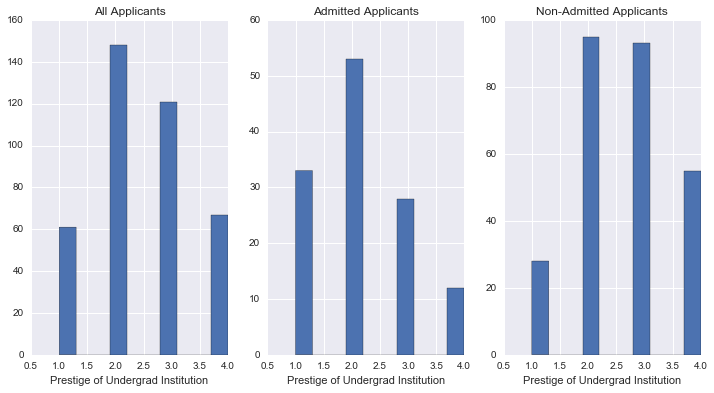

In [22]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.hist(ucla["prestige"])
plt.xlabel("Prestige of Undergrad Institution")
plt.title("All Applicants")
plt.subplot(1,3,2)
plt.hist(admit["prestige"])
plt.xlabel("Prestige of Undergrad Institution")
plt.title("Admitted Applicants")
plt.subplot(1,3,3)
plt.hist(nonadmit["prestige"])
plt.xlabel("Prestige of Undergrad Institution")
plt.title("Non-Admitted Applicants")

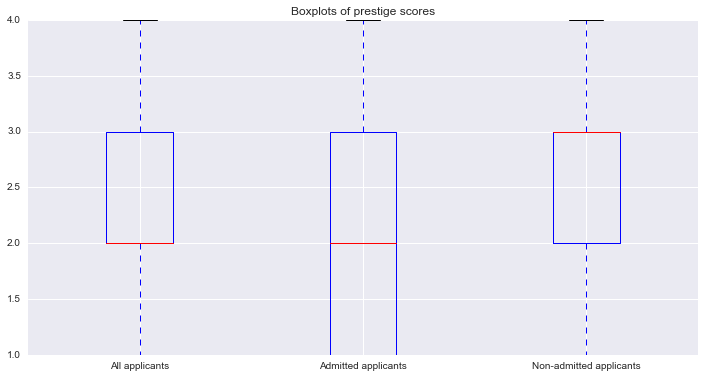

In [23]:
plt.figure(figsize = (12,6))
prestige_data = [ucla["prestige"], admit["prestige"], nonadmit["prestige"]]
labels = ["All applicants", "Admitted applicants", "Non-admitted applicants"]
plt.title("Boxplots of prestige scores")
plt.boxplot(prestige_data, labels = labels);

## 5. Covariance Matrix

In [24]:
# covariance matrix
ucla.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


## 6. Issues and Limitations of Exploratory Data Analysis

The exploratory data analysis (EDA) shows that UCLA favors grad school applicants who have high GRE scores and GPAs and who come from prestigious schools. This is not especially surprising. 

However, the EDA does not show the relative importance of these values in determining admission to UCLA's graduate programs. For example, it is unclear whether UCLA places more weight upon GRE scores or GPA in deciding whether to admit an applicant. Building a model to predict admission will hopefully shed some light on this.

Also, as noted above, three rows were dropped due to missing values. Given that this is less than 1% of the dataset, I don't believe that the findings of the EDA were significantly affected by this. However, in other datasets, dropping rows with missing values may very well affect the EDA.

Finally, the EDA does not shed any light upon any interaction effects, which may or may not be present. For example, it may be possible that the combination of, say, a high GPA and a low prestige score (i.e., a more prestigious undergraduate institution) have a greater impact upon whether an applicant is admitted than either GPA or prestige alone. The EDA does not indicate whether any interaction effects are present, let alone what those effects may be.